In [1]:
#Librerias que vamos a utilizar
import numpy as np
import pyhdf.SD
from pyhdf.SD import SD,SDC #Necesitamos la libreria pyhdf para leer archivos y SD una clase
import glob #una libreria que usamos
import pandas as pd
import matplotlib.pyplot as plt
import re #liberia para regex que luego usaremos en texto
import datetime

Datos 

In [2]:
#Ruta donde se encuentran los archivos hdf
DataPath = '/home/user/Escritorio/DATOS_POSTA/6abril/archivo'

#Generamos una variable con todos los archivos de la carpeta
Filelist = glob.glob(DataPath+'/*')

#Ruta donde se encuentran los archivos hdf
DataPath = '/home/user/Escritorio/DATOS_POSTA/6abril/geolocation'

#Generamos una variable con todos los archivos de la carpeta
Filelist_geo = glob.glob(DataPath+'/*')

In [3]:
from ipynb.fs.full.funciones_hdf import *

Trabajamos con los datos previos al incendio

In [4]:
#Archivo con datos previos al incendio
bef_fire = lee_archivo(Filelist[0])

#Archivo con datos georeferenciados previos al incendio
bef_fire_geo = lee_archivo(Filelist_geo[0])

#Hora y fecha 
bef_fire_date = fecha_archivo(bef_fire)

bef_fire_hour = hora_archivo(bef_fire)

#Latitud y longitud
bef_fire_lat = extrae_datos_hdf(bef_fire_geo,"Latitude")[0]
bef_fire_lon = extrae_datos_hdf(bef_fire_geo,"Longitude")[0]

In [5]:
visualiza_hdf(bef_fire)

,Datasets
0,Latitude
1,Longitude
2,EV_1KM_RefSB
3,EV_1KM_RefSB_Uncert_Indexes
4,EV_1KM_Emissive
5,EV_1KM_Emissive_Uncert_Indexes
6,EV_250_Aggr1km_RefSB
7,EV_250_Aggr1km_RefSB_Uncert_Indexes
8,EV_250_Aggr1km_RefSB_Samples_Used
9,EV_500_Aggr1km_RefSB


In [6]:
#Calculamos Indice normalizado de area quemada
bef_fire_nbr = indice_nbr(bef_fire,"EV_500_Aggr1km_RefSB","band_names")

Graficado

In [7]:
from matplotlib.ticker import FixedLocator
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [8]:
# Cargamos los límites de países y provincias para poder graficarlas en los mapas

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='black')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='white')

/home/user/.local/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


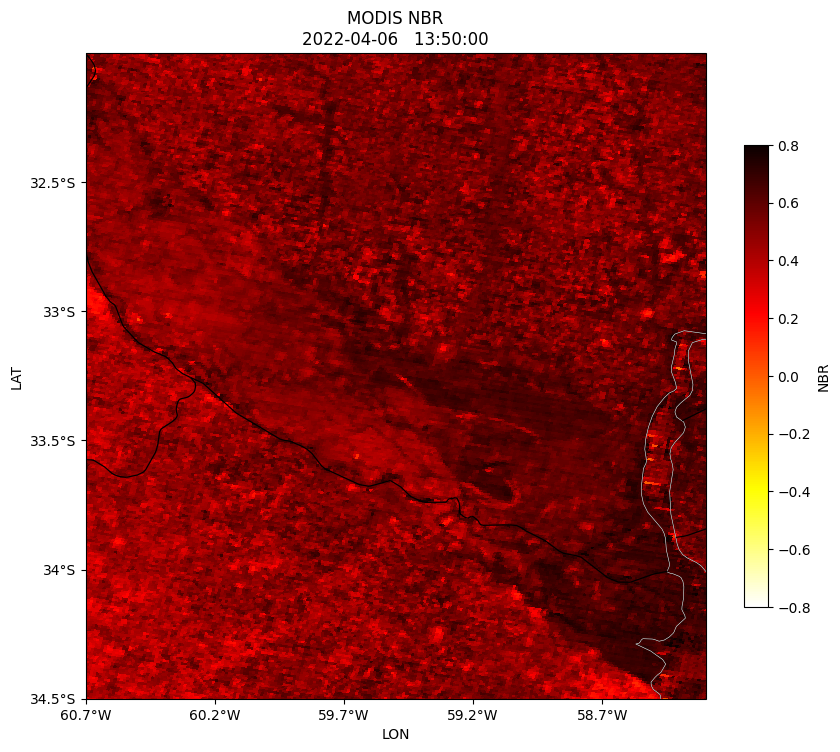

In [9]:
# Definimos los limites del area a visualizar
latnorth=-32
latsouth=-34.5
lonwest=-60.7
loneast=-58.3

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos

#Agregamos ejes
ax1.set_title("MODIS NBR\n"+str(bef_fire_date)+"   "+str(bef_fire_hour))
ax1.set_ylabel("LAT")
ax1.set_xlabel("LON")
    
cm=ax1.pcolormesh(bef_fire_lon,bef_fire_lat,bef_fire_nbr,cmap='hot_r',vmin=-0.8,vmax=0.8)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.9)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('NBR',fontsize=10)

### Datos post incendio

In [10]:
#Ruta donde se encuentran los archivos hdf
DataPath = '/home/user/Escritorio/DATOS_POSTA/septiembre/archivo'

#Generamos una variable con todos los archivos de la carpeta
Filelist = glob.glob(DataPath+'/*')

#Ruta donde se encuentran los archivos hdf
DataPath = '/home/user/Escritorio/DATOS_POSTA/septiembre/geolocation'

#Generamos una variable con todos los archivos de la carpeta
Filelist_geo = glob.glob(DataPath+'/*')

In [11]:
#Archivo con datos post al incendio
aft_fire = lee_archivo(Filelist[0])

#Archivo con datos georeferenciados post al incendio
aft_fire_geo = lee_archivo(Filelist_geo[0])

#Hora y fecha 
aft_fire_date = fecha_archivo(aft_fire)

aft_fire_hour = hora_archivo(aft_fire)

#Latitud y longitud
aft_fire_lat = extrae_datos_hdf(aft_fire_geo,"Latitude")[0]
aft_fire_lon = extrae_datos_hdf(aft_fire_geo,"Longitude")[0]

In [12]:
#Calculamos Indice normalizado de area quemada
aft_fire_nbr = indice_nbr(aft_fire,"EV_500_Aggr1km_RefSB","band_names")

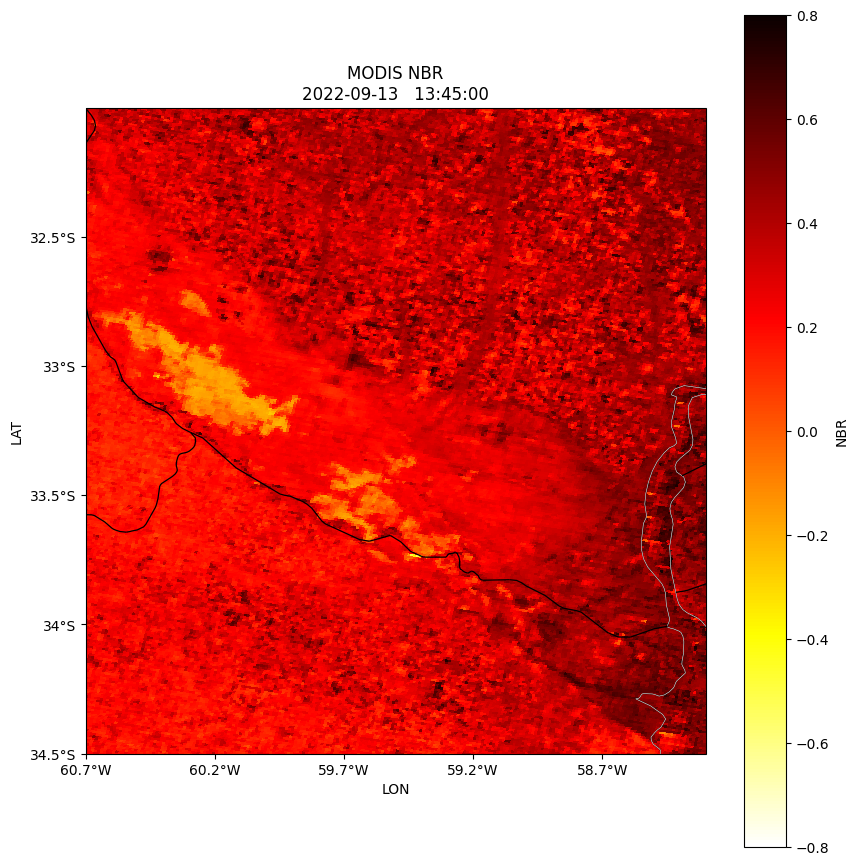

In [13]:
# Definimos los limites del area a visualizar
latnorth=-32
latsouth=-34.5
lonwest=-60.7
loneast=-58.3

fig=plt.figure(figsize=(10,18))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos

#Agregamos ejes
ax1.set_title("MODIS NBR\n"+str(aft_fire_date)+"   "+str(aft_fire_hour))
ax1.set_ylabel("LAT")
ax1.set_xlabel("LON")
    
cm=ax1.pcolormesh(aft_fire_lon,aft_fire_lat,aft_fire_nbr,cmap='hot_r',vmin=-0.8,vmax=0.8)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.9)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('NBR',fontsize=10)

### Diferencia y clasificación

In [14]:
dnbr = bef_fire_nbr - aft_fire_nbr

In [15]:
import xarray as xr
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors

In [16]:
# Define dNBR classification bins
dnbr_class_bins = [-np.inf, -.25, -.10, .10, .27, 0.44, .66, np.inf]

#dnbr_landsat_class = np.digitize(dnbr_landsat, dnbr_class_bins)

dnbr_modis_class = xr.apply_ufunc(np.digitize,
                                    dnbr,
                                    dnbr_class_bins)
dnbr_modis_class

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 2, 2],
       [3, 3, 3, ..., 3, 2, 2],
       [3, 3, 3, ..., 3, 2, 2]])

In [17]:
dnbr_cat_names = [" ", "Enhanced Regrowth, high",
                  " ", "Enhanced Regrowth, low",
                  " ","Unburned",
                  " ", "Low Severity",
                  " ","Moderate low-Severity",
                  " ","Moderate high-Severity",
                  " ","High Severity", ""]

In [18]:
cmap = plt.cm.hot_r # define the colormap - INDICAR LA PALETA QUE QUERES DISCRETIZAR

cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = colors.LinearSegmentedColormap.from_list(
    cmap, cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(1, 7, 8)
norm = colors.BoundaryNorm(bounds, cmap.N)
#nbr_cmap = ListedColormap(nbr_colors)

In [19]:
#busque posiciones donde el archivo de geo tenga latitudes encerradas entre eso y lo mismo con las
#latitudes para el dia previo
#analogo dia despues
#obtengo 2 arrays
#bef_fire_lat #datos

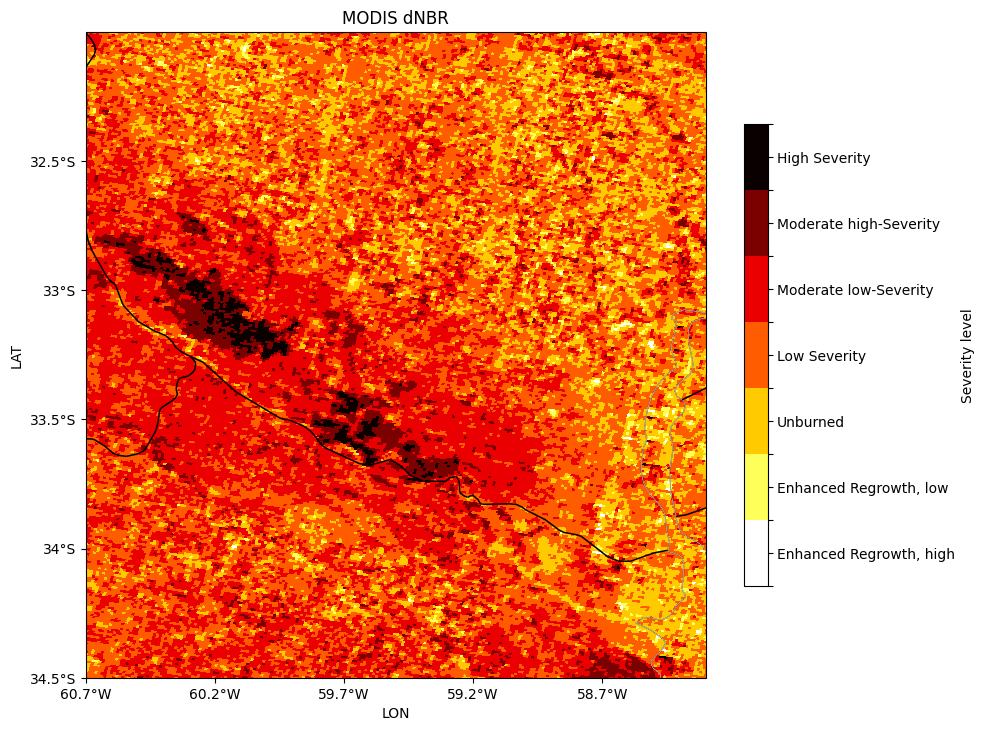

In [23]:
# Definimos los limites del area a visualizar
latnorth=-32
latsouth=-34.5
lonwest=-60.7
loneast=-58.3

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon
    
ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(aft_fire_lon,aft_fire_lat, dnbr_modis_class,cmap=cmap, norm=norm)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=1.1)

#Agregamos ejes
ax1.set_title("MODIS dNBR")
ax1.set_ylabel("LAT")
ax1.set_xlabel("LON")
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_ticks(np.linspace(1, 7, 15))
cbar.set_ticklabels(dnbr_cat_names)
cbar.set_label('Severity level',fontsize=10)

In [21]:
#dudas

#tema dde dnbr las latitudes o longitudes a agarrar
#tema de discretizar la escala de colores
